# Ligand binding

Usually one or more of the transitions in receptor model involve ligand binding.  For example,
consider a receptor model with two sequential ligand binding transitions.

(ligands:three_state_model)=

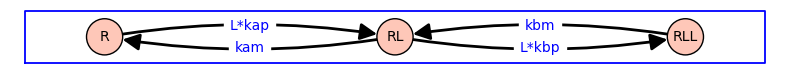

In [1]:
var('R RL RLL L kap kam kbp kbm')
G = DiGraph({R: {RL:kap*L}, RL: {R:kam, RLL:kbp*L}, RLL: {RL:kbm}})
pos = {R: (0, 0), RL: (2, 0), RLL: (4, 0)}
G.plot(figsize=8,edge_labels=True,pos=pos,graph_border=True,vertex_size=1000)

This state-transition diagram has the topology of a symmetric directed [path graph](example_graphs:path_graph) on 3 vertices.  It can be shown that the steady-state fraction of receptors in each of these three states is given by

In [2]:
z_R = kam*kbm; z_RL = kap*L*kbm; z_RLL = kap*L*kbp*L

z_T = z_R+z_RL+z_RLL

R = z_R/z_T; RL = z_RL/z_T; RLL = z_RLL/z_T

print('R   =',R); print('RL  =',RL); print('RLL =',RLL)

R   = kam*kbm/(L^2*kap*kbp + L*kap*kbm + kam*kbm)
RL  = L*kap*kbm/(L^2*kap*kbp + L*kap*kbm + kam*kbm)
RLL = L^2*kap*kbp/(L^2*kap*kbp + L*kap*kbm + kam*kbm)


Next we substitute values for the four rate constants and plot the resulting binding curve(s).  Each binding curve gives the fraction of receptors in a particular state (`R`, `RL`, `RLL`) as a function of ligand concentration (`L`)

R   = 1/(10*L^2 + L + 1)
RL  = L/(10*L^2 + L + 1)
RLL = 10*L^2/(10*L^2 + L + 1)


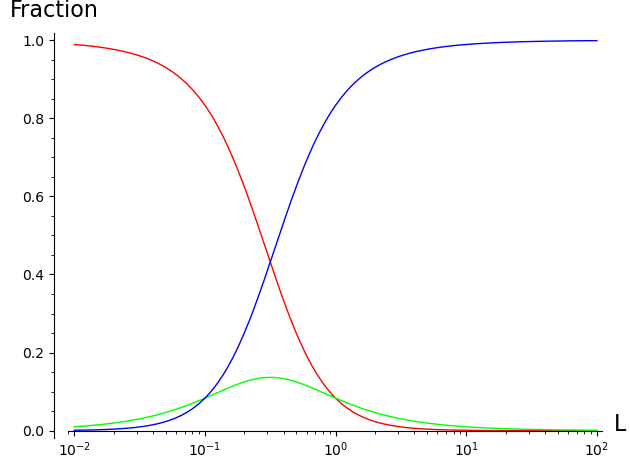

In [3]:
params = {kap:1,kam:1,kbp:10,kbm:1}
R = R.subs(params); RL = RL.subs(params); RLL = RLL.subs(params)
print('R   =',R); print('RL  =',RL); print('RLL =',RLL)

Lmin=0.01; Lmax=100;

pR   = plot_semilogx(R,  (L, Lmin, Lmax), rgbcolor=(1,0,0))
pRL  = plot_semilogx(RL, (L, Lmin, Lmax), rgbcolor=(0,1,0))
pRLL = plot_semilogx(RLL,(L, Lmin, Lmax), rgbcolor=(0,0,1), axes_labels=['L', 'Fraction'])

show(pR+pRL+pRLL)

At low ligand concentration most receptors are in the unbound form (`R`, red). At high concentrations most receptors are in the doubly bound form (`RLL`, blue).

For any given ligand concentration, the fraction of receptors in each of the three states sums to 1.  This can be shown by asking Sagemath to solve for the values of `L` that satisfy `R+RL+RLL == 1`, as follows:

In [4]:
solve(R+RL+RLL == 1,L)

[L == L]

The answer indicates that `R+RL+RLL == 1` whenever `[L == L]`, that is, for any value of `L`.


## Equilibrium association constants

The receptor model presented above has the property that the fraction of receptors in each state satisfy detailed balance.  As a consequence, the fraction of receptors in each state can be written in terms of the equilibrium association constants `ka=kap/kam` and `kb=kbp/kbm`.

To see this, divide the numberator and denominator of the expressions for `R`, `RL`, `RLL` by `kam*kbm` to obtain

In [5]:
var('ka kb')

z_R = 1; z_RL = ka*L; z_RLL = ka*L*kb*L; z_T = z_R+z_RL+z_RLL

R = z_R/z_T; RL = z_RL/z_T; RLL = z_RLL/z_T

print('R =',R,'','RL =',RL,'','RLL =',RLL)

R = 1/(L^2*ka*kb + L*ka + 1)  RL = L*ka/(L^2*ka*kb + L*ka + 1)  RLL = L^2*ka*kb/(L^2*ka*kb + L*ka + 1)


The filled circles on the plot below show that these expressions give the same three binding curves for `R`, `RL`, and `RLL` as a function of `L`.

R   = 1/(10*L^2 + L + 1)  RL  = L/(10*L^2 + L + 1)  RLL = 10*L^2/(10*L^2 + L + 1)


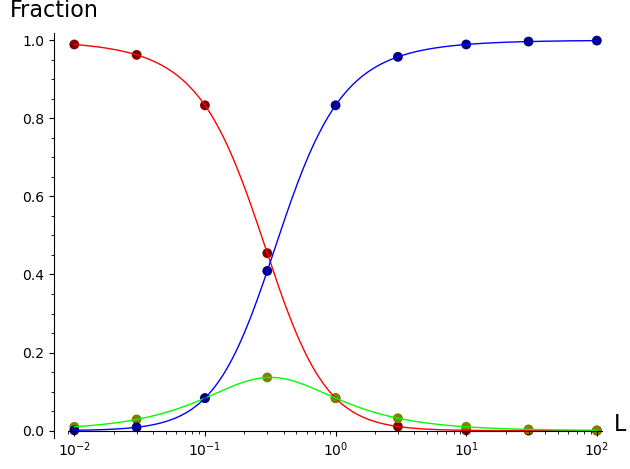

In [6]:
params = {ka:1,kb:10}
R = R.subs(params); RL = RL.subs(params); RLL = RLL.subs(params)
print('R   =',R,'','RL  =',RL,'','RLL =',RLL)

X = [0.01,0.03,0.1,0.3,1,3,10,30,100]

vReq = [(x, R(L=x)) for x in X]
pReq = points(vReq, rgbcolor=(0.5,0,0), pointsize=50)

vRLeq = [(x, RL(L=x)) for x in X]
pRLeq = points(vRLeq, rgbcolor=(0.5,0.5,0), pointsize=50)

vRLLeq = [(x, RLL(L=x)) for x in X]
pRLLeq = points(vRLLeq, rgbcolor=(0,0,0.5), pointsize=50)

show(pR + pRL + pRLL + pReq + pRLeq + pRLLeq)

## Equilibrium binding curves and arborescences

Receptor models and equilibrium binding curves can be compactly specified as an (_arborescence_)[https://en.wikipedia.org/wiki/Arborescence_(graph_theory)] with directed edges (arcs) weighted by association constants and ligand concentrations. In graph theory, an arborescence is a directed graph having a distinguished vertex `u` (called the root) such that, for any other vertex `v`, there is exactly one directed path from `u` to `v`.

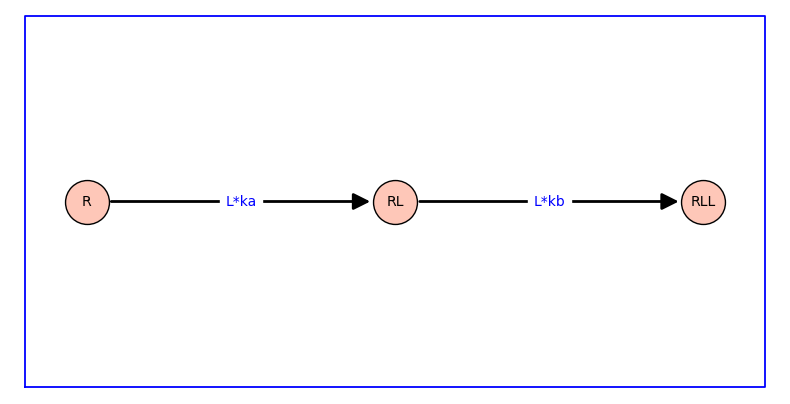

In [7]:
T = DiGraph({'R': {'RL':ka*L}, 'RL': {'RLL':kb*L}})
pos = {'R': (0, 0), 'RL': (2, 0), 'RLL': (4, 0)}
T.plot(figsize=8,edge_labels=True,pos=pos,graph_border=True,vertex_size=1000)

In the arborescence shown above, the root is state `R`. 

## Equilibrium binding curves and rooted spanning trees

An arborescence is a _rooted spanning tree_ of the state-transtion diagram with arrows reversed.

When specifying a receptor model and equilibrium binding curve as a rooted spanning tree, the orientation of the arcs specify the reverse direction of each tansition (reactant {math}`\leftarrow` product).

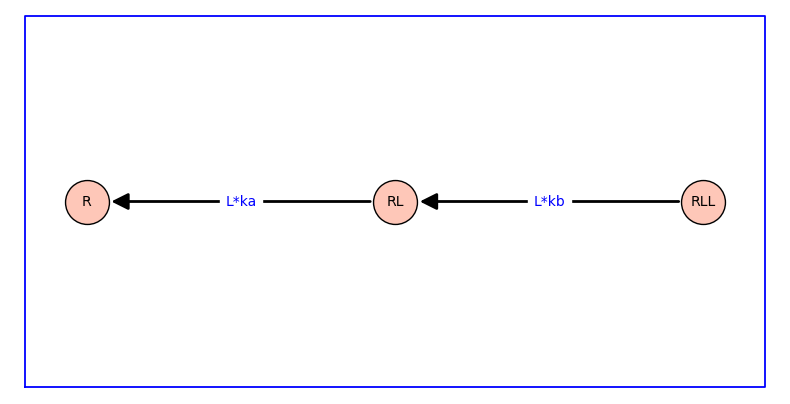

In [8]:
T = DiGraph({'RL': {'R':ka*L}, 'RLL': {'RL':kb*L}})
pos = {'R': (0, 0), 'RL': (2, 0), 'RLL': (4, 0)}
T.plot(figsize=8,edge_labels=True,pos=pos,graph_border=True,vertex_size=1000)

:::{admonition} arborescence vs. rooted spanning tree
:class: tip

A receptor model and its equilibrium binding curve can be specifed either as an arborescence or a rooted spanning tree. The two approaches are equivalent.

However, the rooted spanning tree formulation is helpful in the analysis of conformation coupling of receptors. For this reason, in the sections that follow, we will specify receptor models as rooted spanning trees.
:::